In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# df = pd.read_csv("../results/rssi_n10_10d_adr.csv")
# df = pd.read_csv("../results/rssi_n10_10d_noadr.csv")
df = pd.read_csv("../results/rssi_berlin_gw200m.csv")
df

,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:34:44-67125)",Unnamed: 1,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:34:44-67125).1",Unnamed: 3,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:34:44-67125).2",Unnamed: 5,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:34:44-67125).3",Unnamed: 7,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:34:44-67125).4",Unnamed: 9,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:34:44-67125).5",Unnamed: 11,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:34:44-67125).6",Unnamed: 13,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:34:44-67125).7",Unnamed: 15,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:34:44-67125).8",Unnamed: 17,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230501-22:34:44-67125).9",Unnamed: 19
0,552.770622,-67.085908,788.923274,-76.993353,797.596636,-59.432667,900.282520,-74.720432,924.945266,-68.567559,978.728559,-79.004526,1257.652893,-69.969752,1861.326345,-89.469793,1880.686186,-71.152428,1953.267471,-74.826206
1,553.970622,-67.085908,790.123274,-76.993353,798.796636,-59.432667,901.482520,-74.720432,926.145266,-68.567559,979.928559,-79.004526,1258.852893,-69.969752,1862.526345,-89.469793,1881.886186,-71.152428,1954.467471,-74.826206
2,1592.129922,-76.475047,1542.797385,-66.262419,2586.284300,-69.971376,2418.018497,-68.860942,1461.710986,-63.729863,1941.309498,-71.880764,1833.385300,-80.173322,2575.109938,-78.337222,2327.305648,-69.098166,2279.807886,-69.621177
3,2568.993996,-77.705602,2600.623798,-69.262072,3230.389011,-67.005213,3436.677227,-62.015396,2850.753673,-59.731901,2774.153017,-70.867313,2919.654681,-81.664331,3462.971349,-71.725859,3543.814302,-72.707630,2787.008007,-69.183923
4,4025.812555,-78.135029,4708.071403,-64.807130,6115.000760,-67.404167,3624.196178,-68.822520,4690.486458,-63.275892,6246.688496,-75.873634,4921.641176,-65.714560,4993.802575,-73.085174,4680.410797,-84.285671,3088.573923,-89.449429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,845751.933705,-63.994942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,846935.011709,-73.173874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,847316.406018,-77.360377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,847728.477131,-69.992778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# rssi_berlin_gw200m.csv
locations = [[-304.52156108273766, 371.6134448465055, 23], [-490.069254154322, 218.16444607650294, 23], [-195.2116354190786, 147.33327780419074, 19], [-826.016524055903, 31.35696931360557, 22], [-364.93909694406386, 433.4378240604358, 23], [-578.9059389930152, 63.82588789400968, 19], [-534.809727985328, 268.8693326263983, 23], [-381.3320065556517, 146.66610824442768, 23], [-834.2487712408622, 196.25904552752453, 19], [-823.3678880051875, 745.5619831521817, 23]]
distances = [253.03766042806518, 295.0526501865405, 446.67603858987115, 582.3046822065767, 204.7559153088667, 443.80766171099435, 264.514425566665, 363.7830704582154, 484.02900246146675, 494.60420677873907]
initial_node_order = ['node0', 'node1', 'node2', 'node3', 'node4', 'node5', 'node6', 'node7', 'node8', 'node9']
conditions = pd.DataFrame(distances, index=initial_node_order)
conditions

,0
node0,253.037660
node1,295.052650
node2,446.676039
node3,582.304682
node4,204.755915
node5,443.807662
node6,264.514426
node7,363.783070
node8,484.029002
node9,494.604207


In [21]:
df_count = pd.read_csv("../results/count_berlin_gw200m.csv")
df_count

,run,repetition,module,name,value
0,General-0-20230501-22:34:44-67125,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 0,546
1,General-0-20230501-22:34:44-67125,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 1,561
2,General-0-20230501-22:34:44-67125,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 2,581
3,General-0-20230501-22:34:44-67125,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 3,604
4,General-0-20230501-22:34:44-67125,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 4,630
5,General-0-20230501-22:34:44-67125,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 5,638
6,General-0-20230501-22:34:44-67125,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 6,660
7,General-0-20230501-22:34:44-67125,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 7,681
8,General-0-20230501-22:34:44-67125,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 8,697
9,General-0-20230501-22:34:44-67125,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 9,718


In [22]:
node_order = []
for i in ["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]:
    node_num = df_count.loc[df_count["value"] == df[i].count()-1].index[0]
    node_order.append("node"+str(node_num))
print(node_order)

['node8', 'node6', 'node0', 'node1', 'node4', 'node9', 'node2', 'node3', 'node7', 'node5']


In [23]:
rssi_values = df[["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]]
rssi_values.set_axis(node_order, axis='columns', inplace=True)
print(rssi_values.head())

       node8      node6      node0      node1      node4      node9  \
0 -67.085908 -76.993353 -59.432667 -74.720432 -68.567559 -79.004526   
1 -67.085908 -76.993353 -59.432667 -74.720432 -68.567559 -79.004526   
2 -76.475047 -66.262419 -69.971376 -68.860942 -63.729863 -71.880764   
3 -77.705602 -69.262072 -67.005213 -62.015396 -59.731901 -70.867313   
4 -78.135029 -64.807130 -67.404167 -68.822520 -63.275892 -75.873634   

       node2      node3      node7      node5  
0 -69.969752 -89.469793 -71.152428 -74.826206  
1 -69.969752 -89.469793 -71.152428 -74.826206  
2 -80.173322 -78.337222 -69.098166 -69.621177  
3 -81.664331 -71.725859 -72.707630 -69.183923  
4 -65.714560 -73.085174 -84.285671 -89.449429  


<AxesSubplot:>

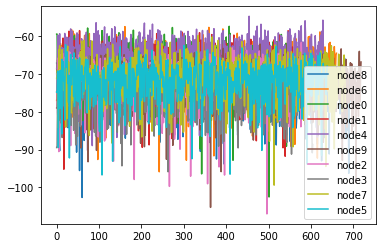

In [24]:
rssi_values.plot.line()

<AxesSubplot:ylabel='Frequency'>

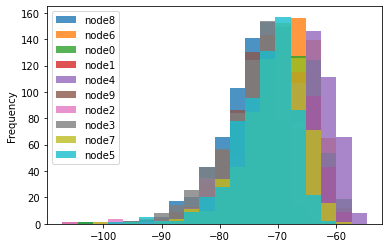

In [25]:
rssi_values.plot.hist(bins=20, alpha=0.8)

<AxesSubplot:>

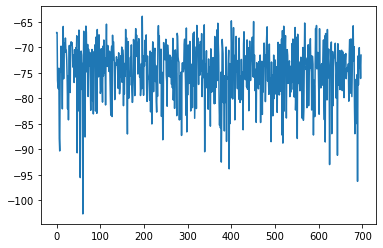

In [26]:
rssi_values["node8"].plot.line()

<AxesSubplot:ylabel='Frequency'>

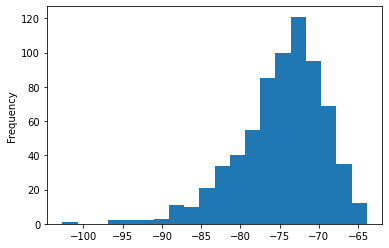

In [27]:
rssi_values["node8"].plot.hist(bins=20)

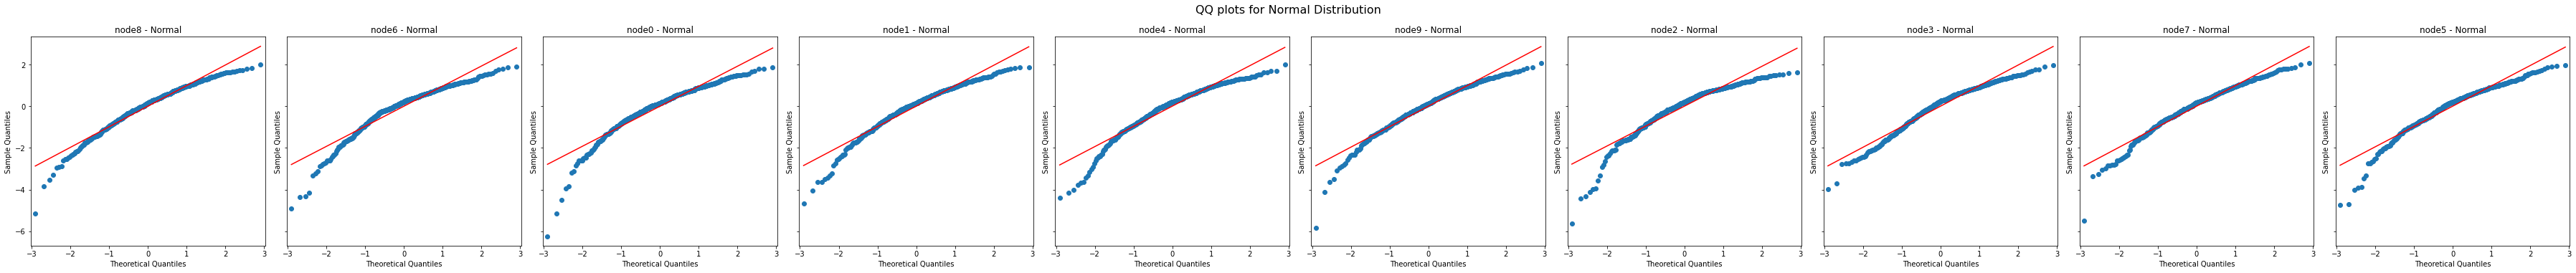

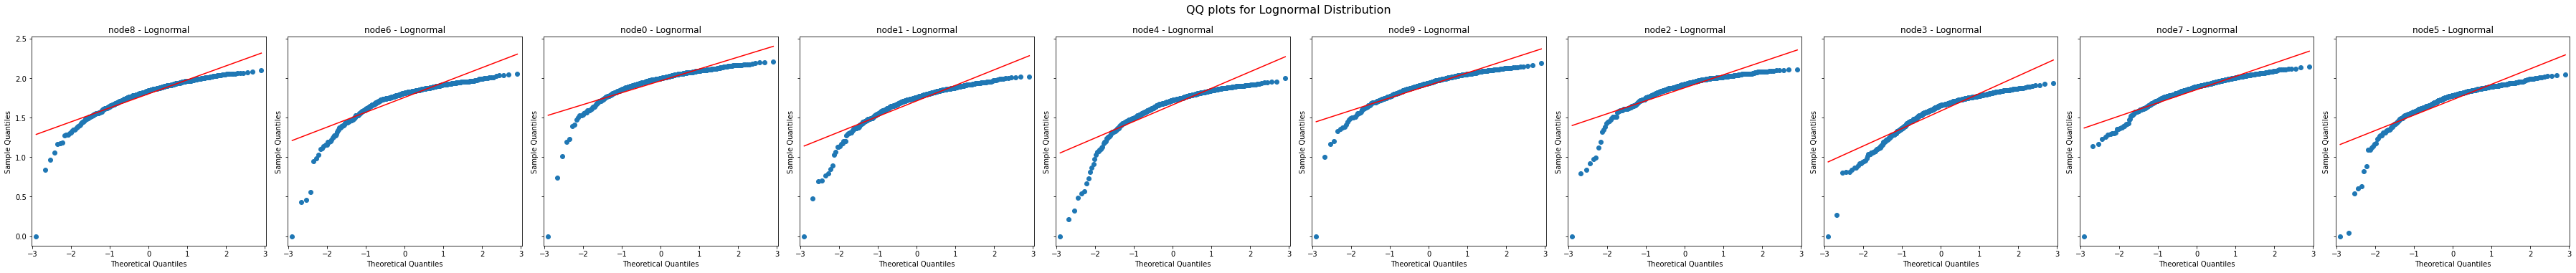

In [28]:
def plot_qq_statsmodels_horizontal(data, distribution_type):
    fig, ax = plt.subplots(1, len(data.columns), figsize=(5 * len(data.columns), 5), sharey=True)
    for idx, column in enumerate(data.columns):
        if distribution_type == "normal":
            sm.qqplot(data[column], line="r", ax=ax[idx])
        elif distribution_type == "lognormal":
            sm.qqplot(np.log(data[column] - data[column].min() + 1), line="r", ax=ax[idx])
        ax[idx].set_title(f"{column} - {distribution_type.capitalize()}")

    plt.tight_layout()
    plt.suptitle(f"QQ plots for {distribution_type.capitalize()} Distribution", fontsize=16, y=1.05)
    plt.show()


cleaned_rssi_values = rssi_values.dropna()
scaler = StandardScaler()
normalized_rssi_values = pd.DataFrame(scaler.fit_transform(cleaned_rssi_values), columns=cleaned_rssi_values.columns)


plot_qq_statsmodels_horizontal(normalized_rssi_values, "normal")
plot_qq_statsmodels_horizontal(normalized_rssi_values, "lognormal")


- norm dist because there is no multipath  
- the reason left end is above the line is that we cannot detect signal below -130dBm  

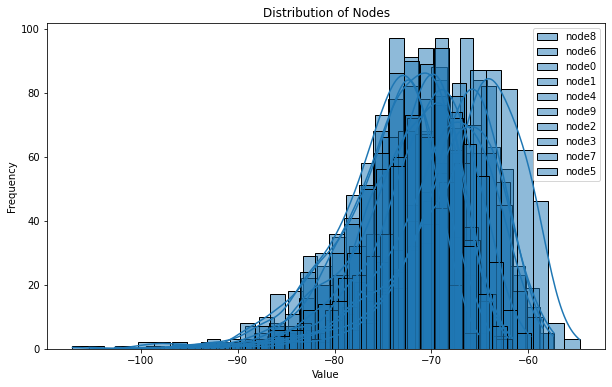

In [29]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create histograms or KDE plots for each node
for column in rssi_values.columns:
    sns.histplot(rssi_values[column], kde=True, ax=ax, label=column)

# Customize the plot
ax.set_title("Distribution of Nodes")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.legend()

# Display the plot
plt.show()

<AxesSubplot:>

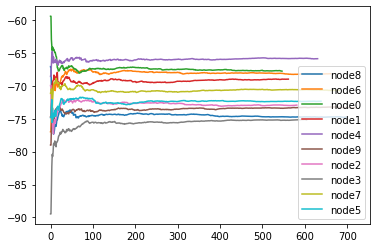

In [30]:
# Calculate the cumulative sum for each column
cumulative_sum = rssi_values.cumsum()

# Calculate the cumulative count for each column
cumulative_count = rssi_values.apply(lambda x: (x.notna().cumsum()))

# Compute the average value for each element by dividing cumulative sum by cumulative count
average_df = cumulative_sum / cumulative_count

# Display the new DataFrame with the average values
average_df.plot.line()

         distance       rssi
node0  253.037660 -67.774599
node1  295.052650 -68.989071
node2  446.676039 -72.933984
node3  582.304682 -75.190897
node4  204.755915 -65.883164
node5  443.807662 -72.346008
node6  264.514426 -68.167121
node7  363.783070 -70.710806
node8  484.029002 -74.772815
node9  494.604207 -73.328669


<AxesSubplot:xlabel='distance', ylabel='rssi'>

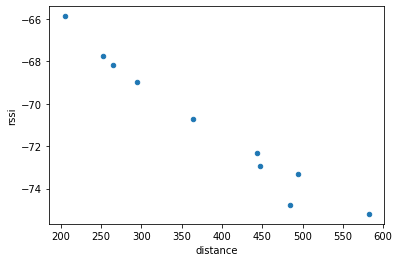

In [31]:
mean_rssi = pd.DataFrame(rssi_values.mean())
rssi_distance = pd.merge(conditions, mean_rssi, left_index=True, right_index=True)
rssi_distance.columns = ["distance", "rssi"]
print(rssi_distance)
rssi_distance.plot.scatter(x="distance",y="rssi")

{'node0': 253.03766042806518, 'node1': 295.0526501865405, 'node2': 446.67603858987115, 'node3': 582.3046822065767, 'node4': 204.7559153088667, 'node5': 443.80766171099435, 'node6': 264.514425566665, 'node7': 363.7830704582154, 'node8': 484.02900246146675, 'node9': 494.60420677873907}
node8
node6
node0
node1
node4
node9
node2
node3
node7
node5


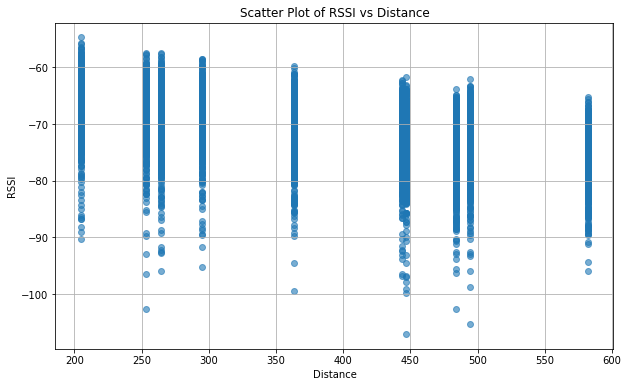

In [32]:
# Create a mapping from node names to their corresponding distance
node_to_distance = conditions.squeeze().to_dict()
print(node_to_distance)

# Create an empty array to store x (distance) and y (rssi) values for the scatter plot
x_values = []
y_values = []

# Iterate through the columns (nodes) in rssi_values
for node in rssi_values.columns:
    # Get the distance for the current node
    print(node)
    distance = node_to_distance[node]
    
    # Get the rssi values for the current node
    rssi_values_node = rssi_values[node].dropna()
    
    # Append the distance value to x_values as many times as there are rssi values
    x_values.extend([distance] * len(rssi_values_node))
    
    # Append the rssi values to y_values
    y_values.extend(rssi_values_node)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.6)

# Add labels and title
plt.xlabel("Distance")
plt.ylabel("RSSI")
plt.title("Scatter Plot of RSSI vs Distance")

# Optionally, you can add a grid for better readability
plt.grid(True)

# Finally, display the plot
plt.show()



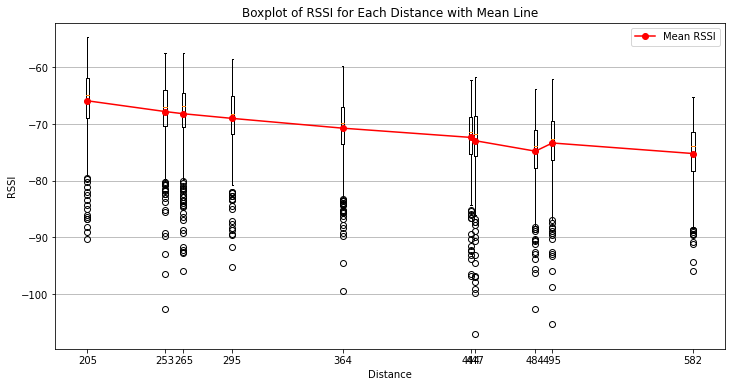

In [34]:
# Create a list of node names
node_names = rssi_values.columns

# Create a mapping from node names to their corresponding distance
node_to_distance = conditions.squeeze().to_dict()

# Create a list of distances corresponding to the node names
distances_list = [node_to_distance[node] for node in node_names]

# Initialize an empty list to store the data for box plots
box_plot_data = []

# Add the RSSI values for each node to the box_plot_data list
for node in node_names:
    box_plot_data.append(rssi_values[node].dropna().tolist())

# Create custom ticks and labels for the x-axis
xticks = distances_list
xticklabels = [int(round(dist)) for dist in xticks]

# Calculate the mean RSSI for each node
mean_rssi_values = [np.mean(rssi) for rssi in box_plot_data]

# Sort the data by distances
sorted_data = sorted(zip(distances_list, box_plot_data, mean_rssi_values))
sorted_distances, sorted_box_plot_data, sorted_mean_rssi_values = zip(*sorted_data)

# Create a box plot for each node with distance on the x-axis
plt.figure(figsize=(12, 6), facecolor="white")
plt.boxplot(sorted_box_plot_data, positions=sorted_distances, widths=2)

# Set custom ticks and labels for the x-axis
sorted_xticks = sorted(xticks)
sorted_xticklabels = [str(int(round(d))) for d in sorted_xticks]
plt.xticks(sorted_xticks, sorted_xticklabels)

# Add labels and title
plt.xlabel("Distance")
plt.ylabel("RSSI")
plt.title("Boxplot of RSSI for Each Distance with Mean Line")

# Optionally, you can add a grid for better readability
plt.grid(axis='y')

# Plot a line connecting the mean RSSI values for each node
plt.plot(sorted_distances, sorted_mean_rssi_values, marker='o', linestyle='-', color='red', label='Mean RSSI')

# Add a legend to the plot
plt.legend()

# Finally, display the plot
plt.show()




# prediction